In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
import joblib

In [221]:
# Load the dataset
data  = pd.read_csv('nyka_top_brands_cosmetics_product_reviews.1.csv')

In [35]:
data.head(5)

,brand_name,review_year,review_rating,is_a_buyer,pro_user,product_title,mrp,price,product_rating,product_rating_count
0,1,2021,5.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
1,1,2020,5.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
2,1,2020,4.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
3,1,2020,3.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
4,1,2020,2.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43


In [225]:
data.tail(5)

,product_id,brand_name,review_id,review_title,review_text,author,review_year,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
61279,1044490,10,17769058,Good,I use this thrice a week. Has helped me in mak...,Radhesh,2021,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61280,1044490,10,17766838,Great,This shampoo has a amazing fragnance and textu...,Shalini Sirohi,2021,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61281,1044490,10,17765866,Really mild and nice,"Used it for the first time, feels really fresh...",Sana kanted,2021,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61282,1044490,10,17761057,Amazing product!,One of the best shampoo which are sulphate and...,neeru chouhan,2021,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61283,4633369,11,25987603,Not good,It is so irritating so bad i don't like this much,Mssuhv,2022,2.0,False,False,NaN,Colorbar Mogra Mist - Scent Of An India Temple...,595,417,1.5,2,NaN,https://www.nykaa.com/colorbar-mogra-mist-scen...


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            61284 non-null  int64  
 1   brand_name            61284 non-null  int64  
 2   review_id             61284 non-null  int64  
 3   review_title          61284 non-null  object 
 4   review_text           61275 non-null  object 
 5   author                61284 non-null  object 
 6   review_year           61284 non-null  int64  
 7   review_rating         61283 non-null  float64
 8   is_a_buyer            61284 non-null  bool   
 9   pro_user              61284 non-null  bool   
 10  review_label          48249 non-null  object 
 11  product_title         61284 non-null  object 
 12  mrp                   61284 non-null  int64  
 13  price                 61284 non-null  int64  
 14  product_rating        61284 non-null  float64
 15  product_rating_coun

In [229]:
data.describe()

,product_id,brand_name,review_id,review_year,review_rating,mrp,price,product_rating,product_rating_count
count,6.128400e+04,61284.000000,6.128400e+04,61284.000000,61283.000000,61284.000000,61284.000000,61284.000000,61284.000000
mean,7.983802e+05,6.269973,1.484995e+07,2020.124747,4.414781,573.260247,462.129512,4.099130,7582.963840
std,1.281418e+06,2.681349,7.383506e+06,1.375558,1.062547,324.098930,264.876964,0.235945,14463.246136
min,2.500000e+02,1.000000,9.600000e+01,2013.000000,1.000000,75.000000,45.000000,1.500000,1.000000
25%,1.604880e+05,3.000000,1.102373e+07,2019.000000,4.000000,300.000000,262.000000,4.000000,1760.000000
50%,4.524430e+05,7.000000,1.525142e+07,2020.000000,5.000000,599.000000,400.000000,4.100000,3925.000000
75%,7.665290e+05,9.000000,2.002927e+07,2021.000000,5.000000,799.000000,639.000000,4.300000,8720.000000
max,7.749427e+06,11.000000,2.963031e+07,2022.000000,5.000000,3874.000000,2947.000000,4.800000,98477.000000


# Data Preprocessing - Data Cleaning

In [231]:
# Remove unwanted columns
data.drop(columns=['product_id', 'review_id','review_title', 'review_text','author','review_label','product_tags','product_url' ], inplace=True)

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            61284 non-null  int64  
 1   review_year           61284 non-null  int64  
 2   review_rating         61283 non-null  float64
 3   is_a_buyer            61284 non-null  bool   
 4   pro_user              61284 non-null  bool   
 5   product_title         61284 non-null  object 
 6   mrp                   61284 non-null  int64  
 7   price                 61284 non-null  int64  
 8   product_rating        61284 non-null  float64
 9   product_rating_count  61284 non-null  int64  
dtypes: bool(2), float64(2), int64(5), object(1)
memory usage: 3.9+ MB


In [237]:
data.isnull().sum()

brand_name              0
review_year             0
review_rating           1
is_a_buyer              0
pro_user                0
product_title           0
mrp                     0
price                   0
product_rating          0
product_rating_count    0
dtype: int64

In [239]:
data = data.dropna()

In [241]:
data.isnull().sum()

brand_name              0
review_year             0
review_rating           0
is_a_buyer              0
pro_user                0
product_title           0
mrp                     0
price                   0
product_rating          0
product_rating_count    0
dtype: int64

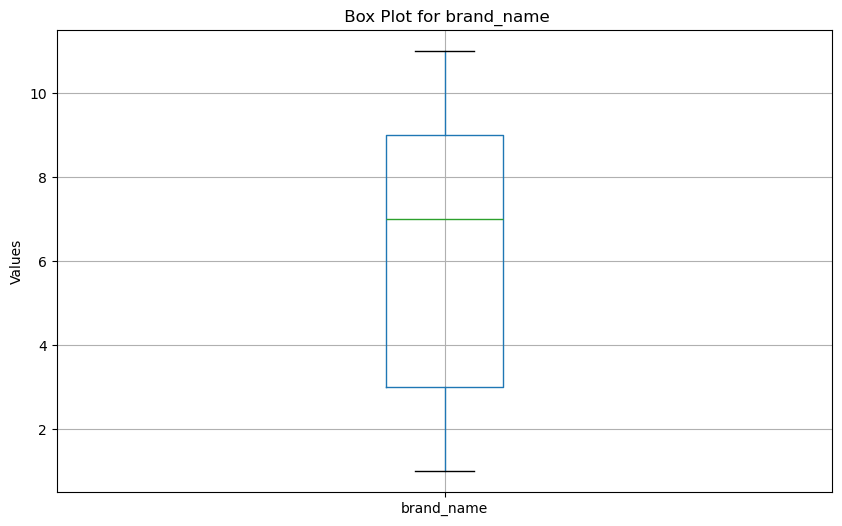

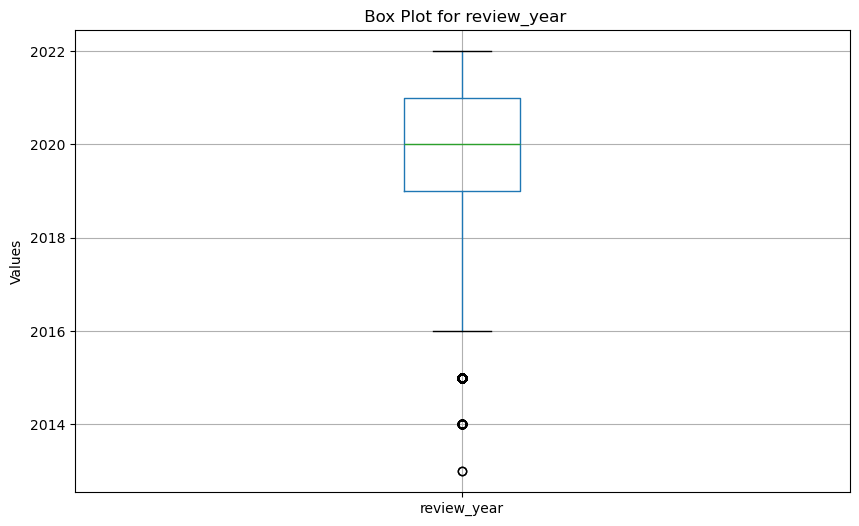

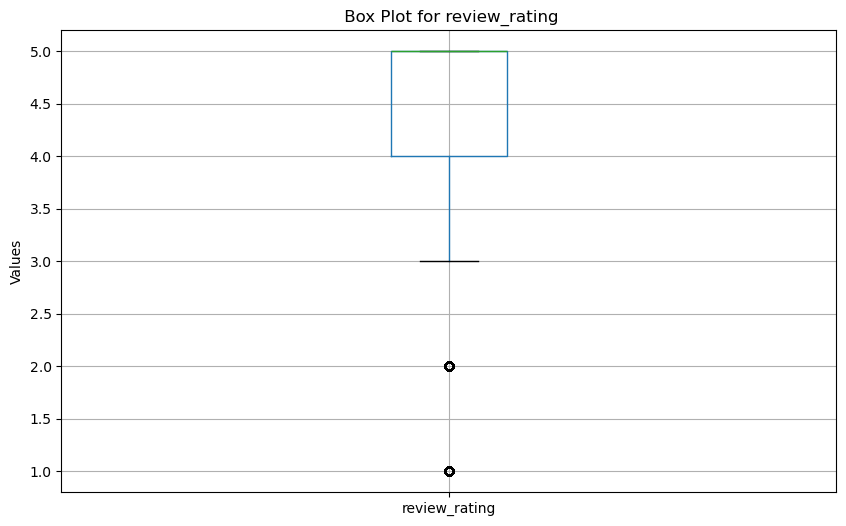

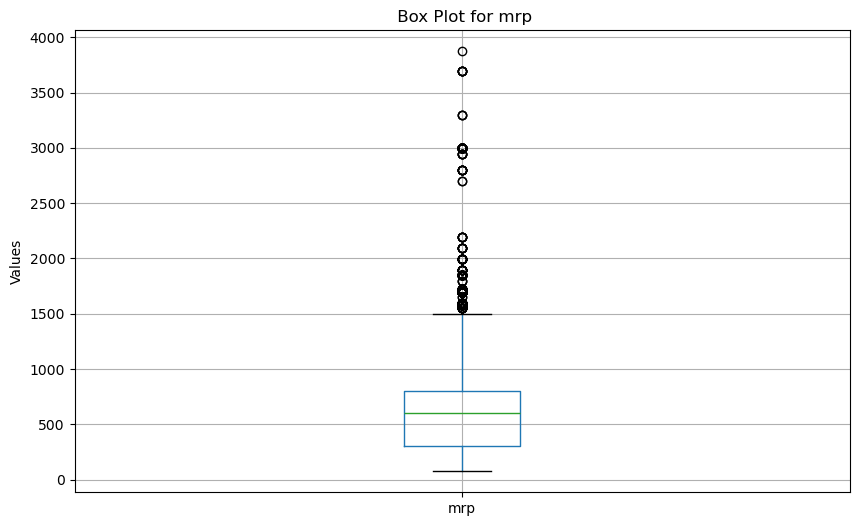

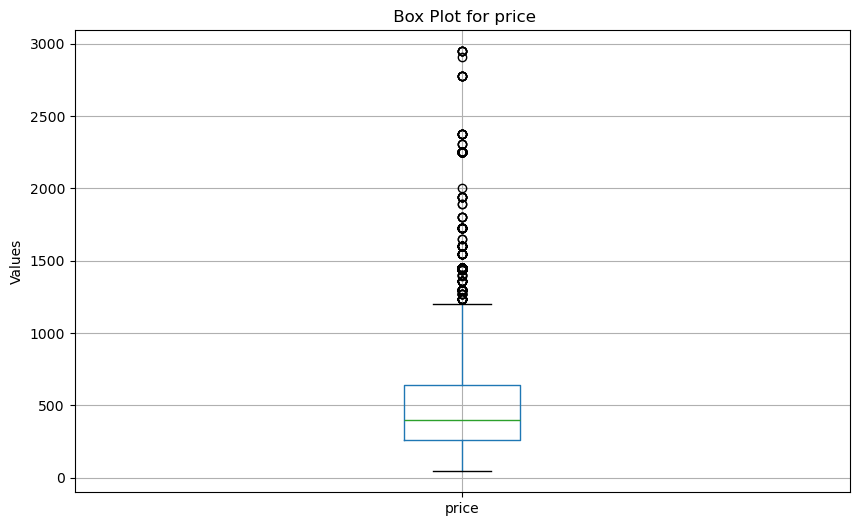

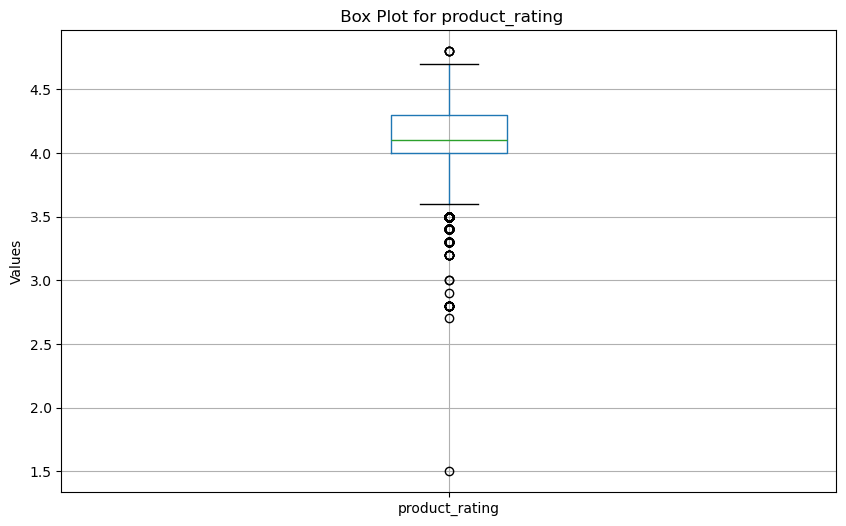

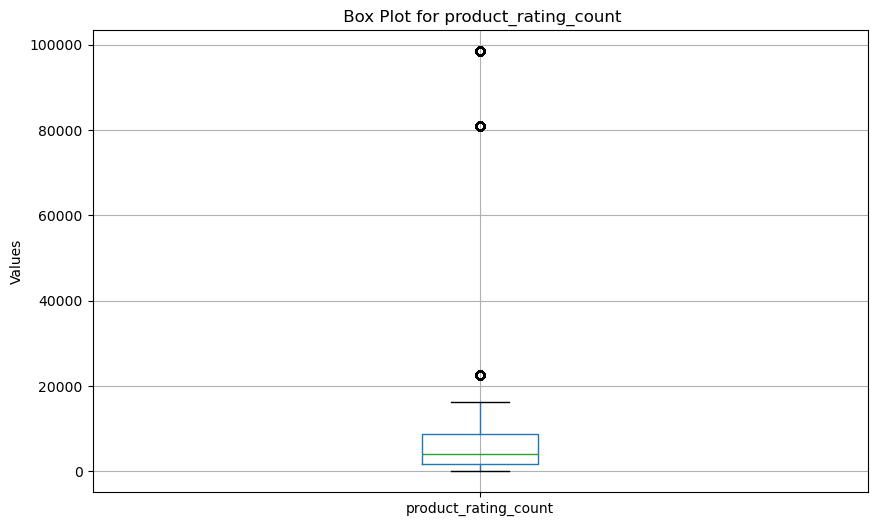

In [243]:
# Box Plot for visualize outliers
columns = data.select_dtypes(include = ['number'])

for col in columns.columns:
    plt.figure(figsize=(10,6))
    columns.boxplot(column = col)
    plt.title(f" Box Plot for {col}")
    plt.ylabel('Values')
    plt.show()

In [245]:
# Outlier's removel with IQR
def handle_outlier(data):
    for col in data.select_dtypes(include = ['int64','float64']).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)

        IQR = Q3 - Q1

        lower = Q1 - 1.5 *IQR
        upper = Q3 + 1.5 *IQR

        data[col] = data[col].apply(lambda x: 
        lower if x<lower else 
        upper if x>upper else
        x)
    return data
data1 = handle_outlier(data)

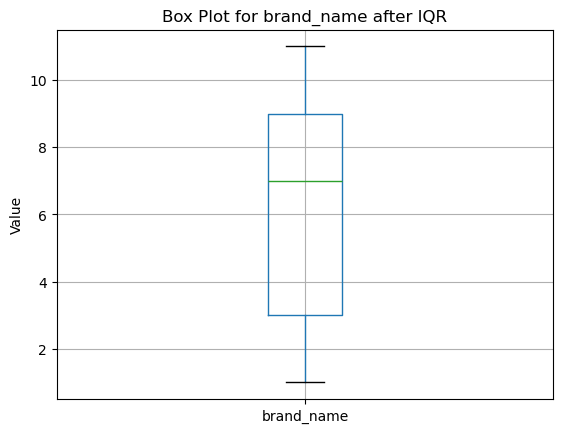

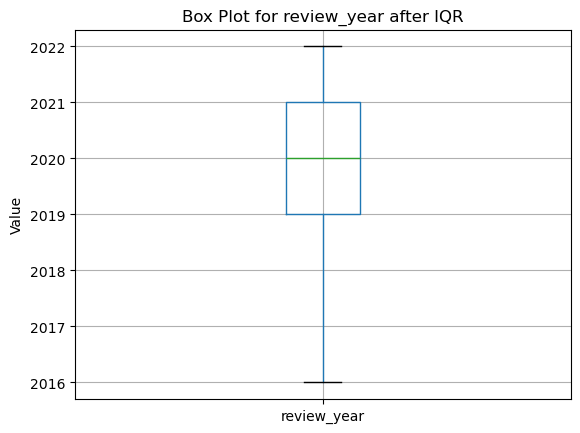

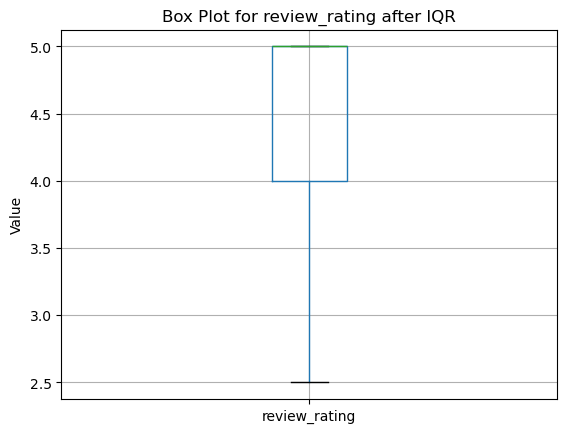

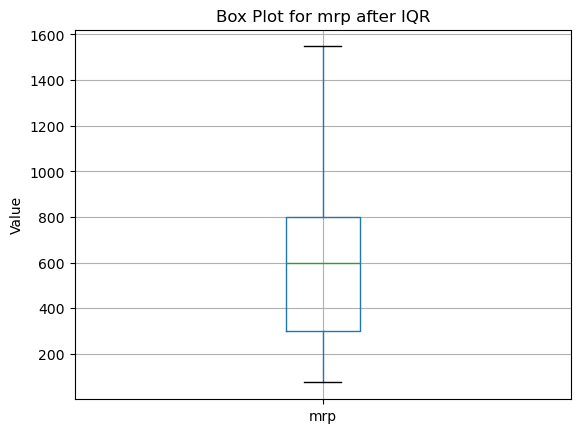

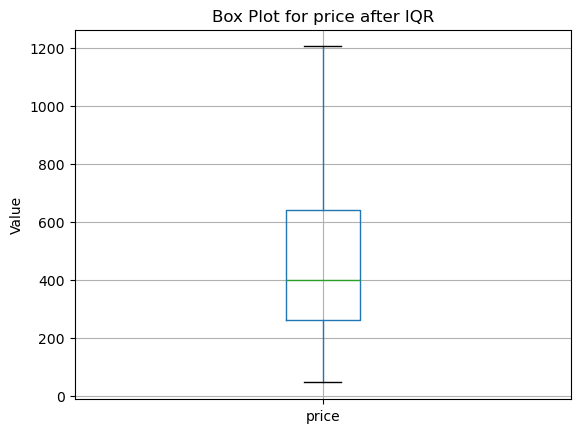

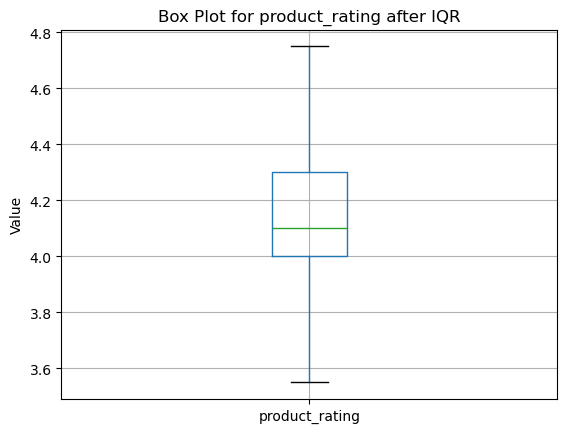

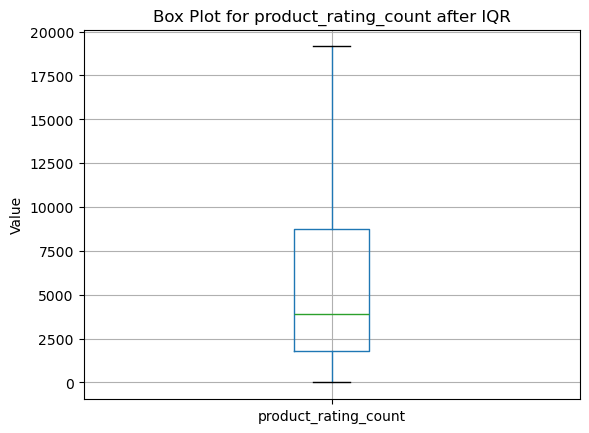

In [249]:
# Box-Plot after removing outliers
column = data1.select_dtypes(include=['int64','float64'])

for col in column.columns:
    plt.figure()
    column.boxplot(column = col)
    plt.title(f"Box Plot for {col} after IQR")
    plt.ylabel('Value')
    plt.show()

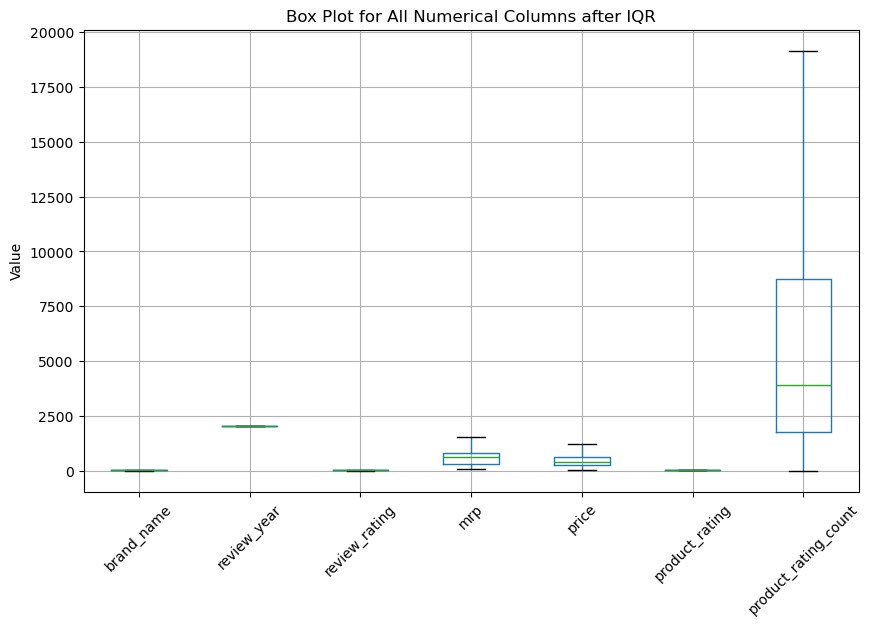

In [251]:
# Select numerical columns
columns = data1.select_dtypes(include=['int64', 'float64'])

# Create a single box plot for all numerical columns
plt.figure(figsize=(10, 6))
columns.boxplot()
plt.title("Box Plot for All Numerical Columns after IQR")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [253]:
# Address Skewed Data
# Check skewness
# Assuming 'data1' is your DataFrame and 'numerical_cols' contains column names of numerical data
numerical_cols = data1.select_dtypes(include=['number']).columns  # or use a specific list
skewness = data1[numerical_cols].apply(lambda x: skew(x.dropna()))
print("Skewness before transformation:\n", skewness)

Skewness before transformation:
 brand_name             -0.147943
review_year            -0.628447
review_rating          -1.434386
mrp                     0.572004
price                   0.622646
product_rating          0.027296
product_rating_count    1.131105
dtype: float64


In [255]:
scaler = StandardScaler()
data1[numerical_cols] = scaler.fit_transform(data1[numerical_cols])
pt = PowerTransformer(method='yeo-johnson')
data1[numerical_cols] = pt.fit_transform(data1[numerical_cols])

In [257]:
# Validate transformations
skewness_after = data[numerical_cols].apply(lambda x: skew(x))
print("Skewness after transformation:\n", skewness_after)

Skewness after transformation:
 brand_name             -0.042427
review_year            -0.066188
review_rating          -0.807358
mrp                     0.079300
price                   0.052870
product_rating         -0.069641
product_rating_count    0.213750
dtype: float64


# Exploratory Data Analysis (EDA)

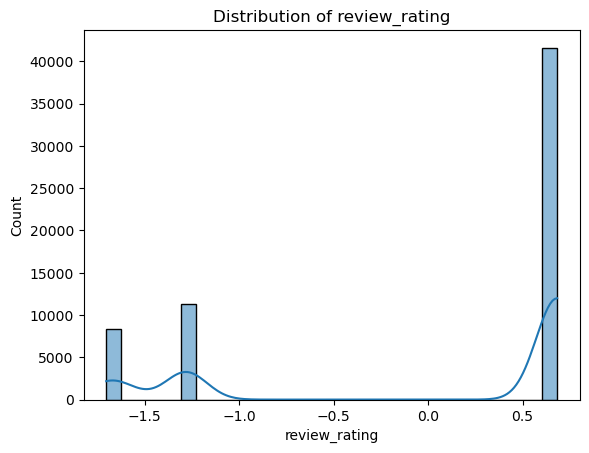

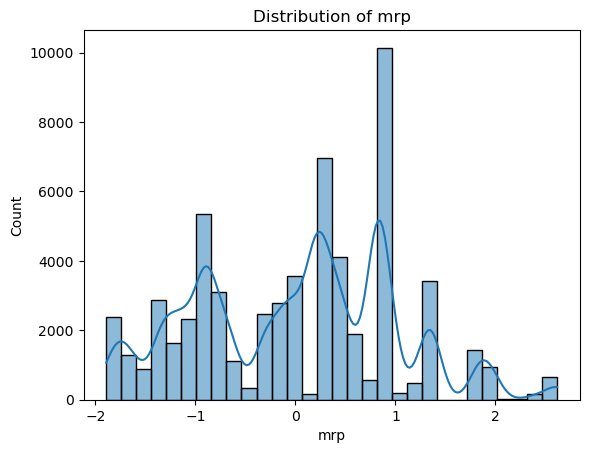

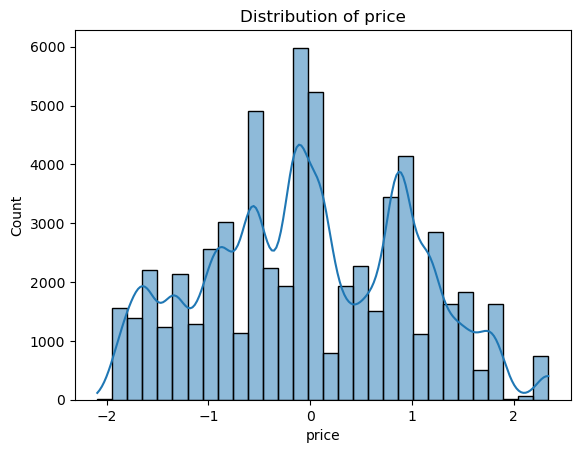

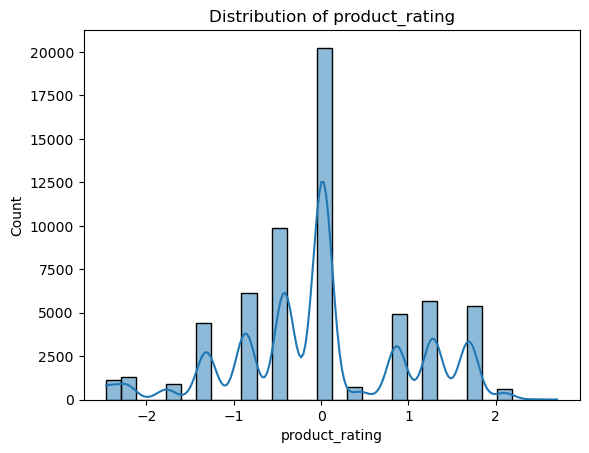

In [259]:
# 1.Histogram: Analyze the distribution of numerical columns
numerical_columns = ['review_rating', 'mrp', 'price', 'product_rating']
for col in numerical_columns:
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

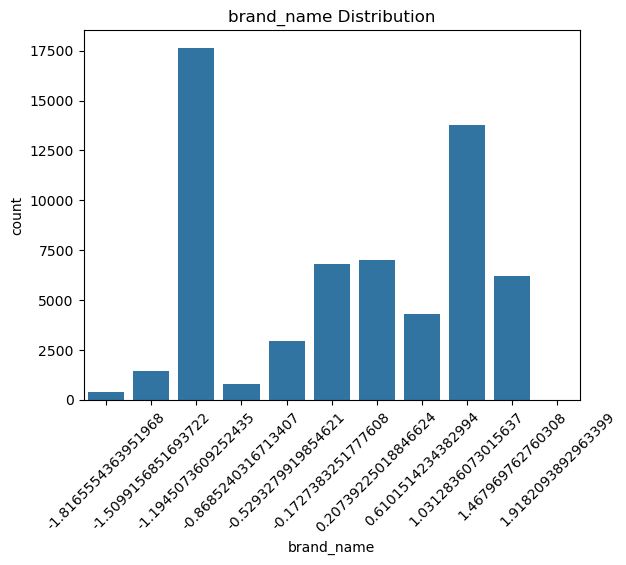

In [261]:
# 2.Count Plot: Distribution of categorical columns
sns.countplot(x='brand_name', data=data)
plt.title('brand_name Distribution')
plt.xticks(rotation=45)
plt.show()

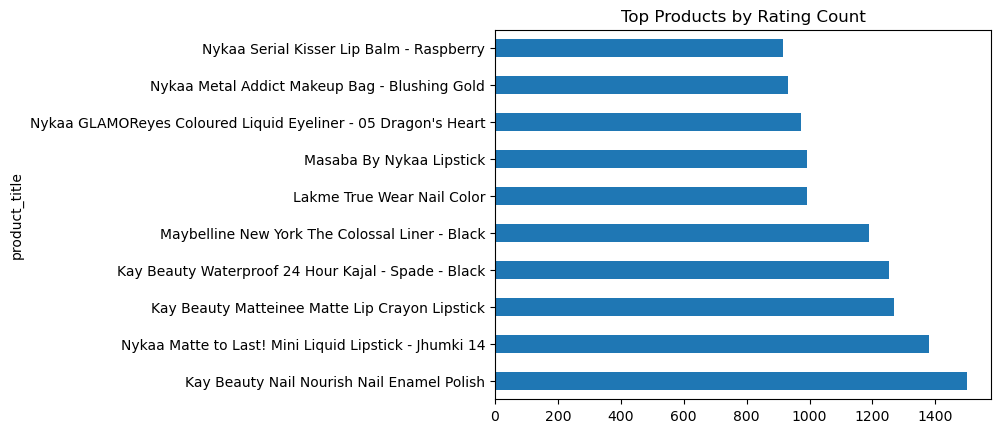

In [263]:
# 3.Bar Plot: Analyze top products by product_rating_count.
top_products = data.groupby('product_title')['product_rating_count'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh')
plt.title('Top Products by Rating Count')
plt.show()

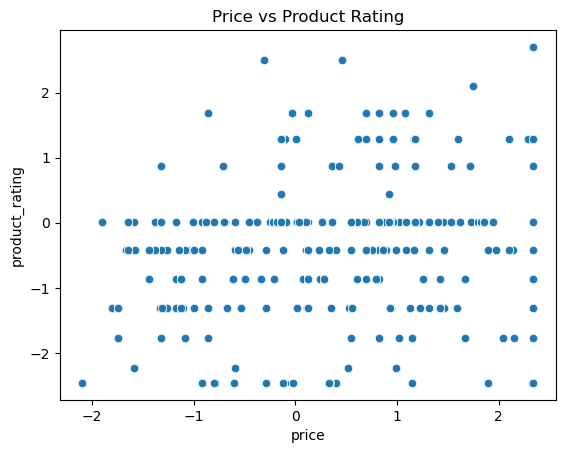

In [265]:
# 4.Scatter Plot: Explore relationships between two numerical variables, e.g., price vs. product_rating.
sns.scatterplot(x='price', y='product_rating', data=data)
plt.title('Price vs Product Rating')
plt.show()

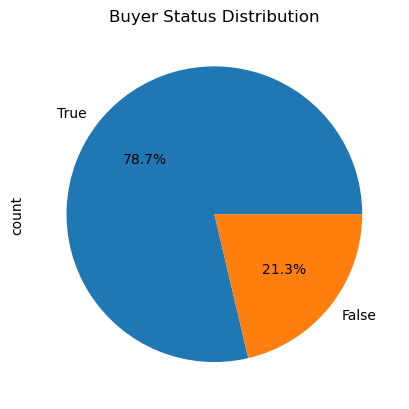

In [267]:
# 5.pie chart: Analyze is_a_buyer and pro_user proportions.
data['is_a_buyer'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Buyer Status Distribution')
plt.show()

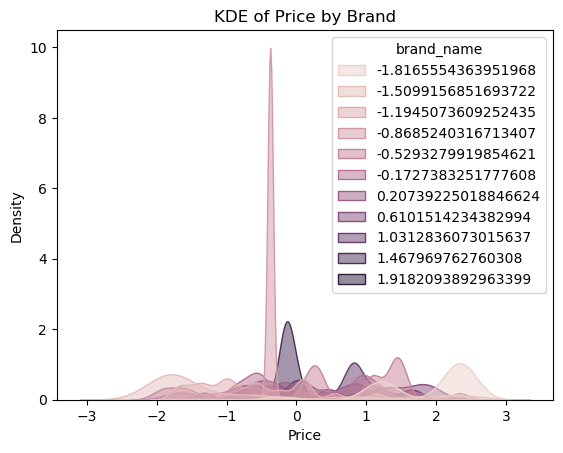

In [271]:
# 6 Kernel Density Estimation (KDE): compare distributions. For example, KDE of price for different brand_name values:
sns.kdeplot(data=data, x='price', hue='brand_name', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE of Price by Brand')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

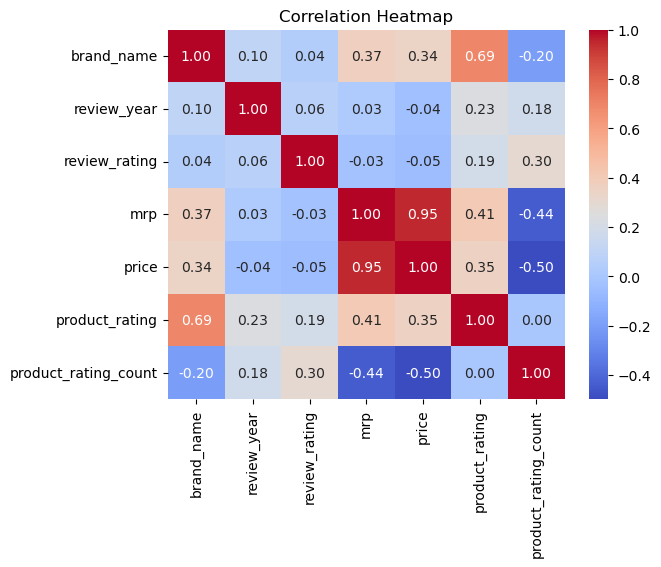

In [273]:
# 7 Heat Map 
# Select only numerical columns (Filters the dataset to include only numerical columns.)
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix(Calculates the correlation matrix only for the selected numerical columns.)
corr_matrix = numerical_data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Feature Selection

In [275]:
# Splitting the dataset into training and testing sets
X = data1.drop('product_rating', axis=1)
y = data1['product_rating']

In [351]:
# Convert non-numeric features to numeric
X = pd.get_dummies(X, drop_first=True)

# Ensure target variable (y) is numeric
y = y.astype(float)

# Feature selection
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Display feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)
print(f"\nSelected Features: {selected_features.tolist()}")

                                               Feature         Score
0                                           brand_name  57242.808055
5                                                  mrp  12175.581211
6                                                price   8821.545301
248      product_title_Nykaa SKINgenius BB Cream SPF30   4263.003205
191  product_title_Nykaa Matte to Last! Mini Metall...   3821.937541
..                                                 ...           ...
269  product_title_Nykaa Strobe & Glow Liquid Highl...      0.000281
162  product_title_Nykaa Cosmetics Blendpro Powder ...      0.000281
133  product_title_Moi Day & Night Fragrance Duo - ...      0.000281
109  product_title_Masaba By Nykaa - Face Palm Lips...      0.000281
176  product_title_Nykaa Cosmetics Ultra Matte Lips...      0.000281

[299 rows x 2 columns]

Selected Features: ['brand_name', 'review_year', 'mrp', 'price', 'product_title_Kay Beauty Eyeshadow Palette', 'product_title_Kay Beauty Matte HD S

In [355]:
# selected features
X_selected = X[selected_features]

# Split Data into Training and Testing Sets

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [359]:
# Check the shapes of the resulting datasets
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Testing target set shape:", y_test.shape)

Training feature set shape: (49026, 299)
Testing feature set shape: (12257, 299)
Training target set shape: (49026,)
Testing target set shape: (12257,)


# Feature Scaling

In [361]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

# Build the ML Model

In [363]:
models = {
    '1. Linear Regression' : LinearRegression(),
    '2. Decision Tree Regressor' : DecisionTreeRegressor(),
    '3. Random Forest Regressor' : RandomForestRegressor(),
    '4. Gradient Boosting Regressor' : GradientBoostingRegressor(),
    '5. Support Vector Regressor' : SVR(),
    '6. MLP Regressor' : MLPRegressor(),
    '7. Lasso Regression' : Lasso(),
    '8. AdaBoost Regressor' : AdaBoostRegressor()
}

# Model Evaluation

In [365]:
results={}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[model_name] = {
    'MSE' : mse,
    'MAE' :mae,
    'R2 Score' : r2,
    'RMSE' :rmse
    }

results_df = pd.DataFrame(results).T
print(results_df)

                                     MSE       MAE  R2 Score      RMSE
1. Linear Regression            0.112322  0.167157  0.885214  0.335144
2. Decision Tree Regressor      0.032315  0.026048  0.966976  0.179763
3. Random Forest Regressor      0.009770  0.016315  0.990015  0.098844
4. Gradient Boosting Regressor  0.076620  0.236360  0.921699  0.276804
5. Support Vector Regressor     0.020434  0.099341  0.979118  0.142947
6. MLP Regressor                0.008729  0.040397  0.991080  0.093429
7. Lasso Regression             0.978656  0.725244 -0.000124  0.989270
8. AdaBoost Regressor           0.344563  0.503757  0.647879  0.586995


In [367]:
# Finding The Best Model
best_model = results_df['R2 Score'].idxmax()
print(f'The best Model based on R2 Score is:\n {best_model}')
print(results_df.loc[best_model])

The best Model based on R2 Score is:
 6. MLP Regressor
MSE         0.008729
MAE         0.040397
R2 Score    0.991080
RMSE        0.093429
Name: 6. MLP Regressor, dtype: float64


# Hyperparameter Tuning

In [369]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [371]:
# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error',verbose =1, n_jobs=-1)

In [373]:
# Fit the Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best parameters and score
print(f"Best Parameters: {best_param}")
print(f"Best Cross-Validation MSE Score: {-best_score}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation MSE Score: 0.001764507063818996


In [375]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing the results
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")

Test MSE: 0.007559827410784893
Test MAE: 0.007559827410784893
Test R2: 0.9922743357725711
Test RMSE: 0.086947267989195


In [377]:
# Evaluating Model Performance with Residual Analysis

# Predicting values  
y_train_pred = best_model.predict(X_train_scaled)  
residuals = y_train - y_train_pred

In [379]:
# Cross-validate the model  
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')  
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

Cross-Validation MSE: 0.001764507063818996


# Pipeline Creation

In [381]:
# spliting data into X and y
X = data1.drop(['product_rating'], axis=1)
y = data1['product_rating']

In [383]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [393]:
from sklearn.compose import ColumnTransformer

# Separate numeric and non-numeric columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Final pipeline with the regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=50,              # Best number of estimators from GridSearchCV
        min_samples_split=5,          # Best min_samples_split from GridSearchCV
        min_samples_leaf=2,           # Best min_samples_leaf from GridSearchCV
        max_depth=10,                 # Best max_depth from GridSearchCV
        random_state=42))])           # Ensure reproducibility

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['brand_name', 'review_year', 'review_rating', 'mrp', 'price',
       'product_rating_count'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['product_title'], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=5, n_estimators=50,
                                       random_state=42))])

# Saving the Model

In [397]:
# Save the entire pipeline
joblib.dump(pipeline,'random_forest_pipeline.joblib')

['random_forest_pipeline.joblib']

# Test with Unseen Data:

In [399]:
# Load the saved pipeline model for prediction
loaded_pipeline = joblib.load('random_forest_pipeline.joblib')

In [419]:
# Load unseen data for prediction and analysis
unseen_data = pd.read_csv('nyka_top_brands_cosmetics_product_reviews.1.csv')
unseen_data.head(1)

,product_id,brand_name,review_id,review_title,review_text,author,review_year,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,1,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,1,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,1,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,1,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,1,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...


In [421]:
# Split unseen data into features (X) and target (y)
X_unseen = unseen_data.drop('product_rating', axis =1)
y_unseen = unseen_data['product_rating']

In [423]:
# Predict the target variable for the unseen data
y_pred_unseen = loaded_pipeline.predict(X_unseen)

In [425]:
# Evaluate model performance on the unseen data
mse_unseen = mean_squared_error(y_unseen, y_pred_unseen)
mae_unseen = mean_absolute_error(y_unseen, y_pred_unseen)
r2_unseen = r2_score(y_unseen, y_pred_unseen)
rmse_unseen = np.sqrt(mse_unseen)

# Print evaluation metrics to assess model performance
print(f"Unseen Data MSE: {mse_unseen}")
print(f"Unseen Data MAE: {mae_unseen}")
print(f"Unseen Data R2: {r2_unseen}")
print(f"Unseen Data RMSE: {rmse_unseen}")

Unseen Data MSE: 10.647336337001649
Unseen Data MAE: 3.24643459269785
Unseen Data R2: -190.26123752018776
Unseen Data RMSE: 3.2630256414870003
